<a href="https://colab.research.google.com/github/ycd991030/Hua-Guo-Shan/blob/master/Group29_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.1

After  searching for the LTA Datamall API documentation, we find that lot type means type of lots. There are 3 lot types:

C(for cars)

H(for Heavy Vehicles)

Y(for Motorcycles)


Q1.2

We start by randomly changing the  query time and observing the data.

We can notice that the database updates at the 27th second of every minute. Hence,the database updates every minute.

Some examples:
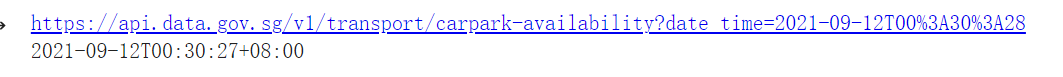

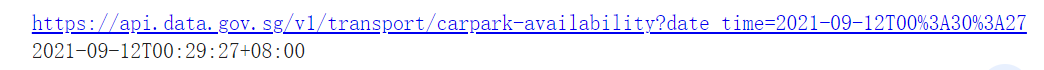

Also, we can notice that the "update_date" time updates about every 20-30 minutes. This means that we do not need to query the database for minute by minute data, because the parking lot information is updated only when "udate_datetime" changes.

To find a reasonable frequency(time interval) to query the data, we will use an infinite loop function to query the database every minute to check whether "update_date" is updated, using the time difference between the time of the second update of "udate_datetime" and the time of the first update of "udate_datetime" as the appropriate query time interval. 



1.3（1）在1960-1975之间浮动
(2)从1.4的720小时的数据来看， 每次取得的车位的数据总条数在1963-1972之间，会随着时间在该区间上下波动。
（3）我们认为lots_availabilty>total_lots,会出现传感器失灵的场景，所以选择了2022年04月12日13时42分53秒，筛选结果如下所示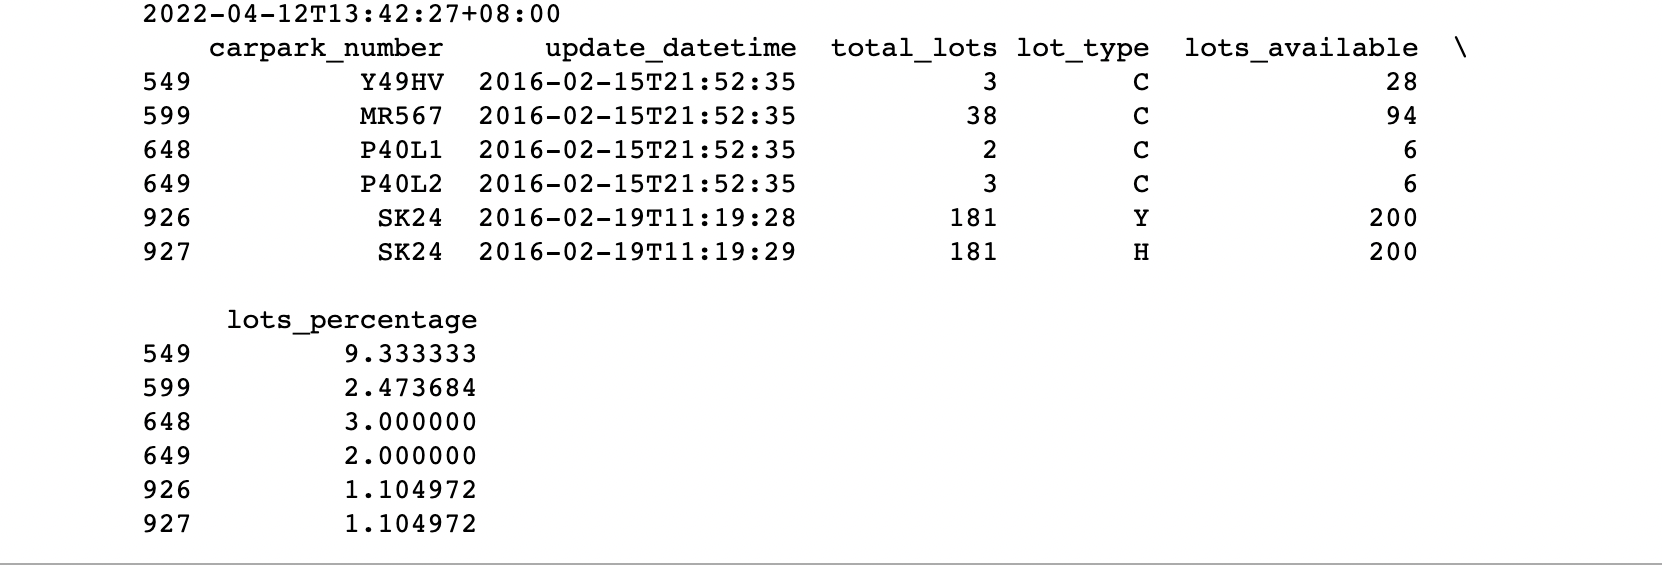

对于3的补充，同时相差时间过大，也可能出现传感器失灵，这样的数据需要清楚，比如在查询2022年的数据时，有些停车场的update_time甚至在2021年之前，这些也需要删除。对于持续时间，lots_availabilty>total_lots持续时间不明，但查询时间久远的停车场我觉得是一直出现故障。

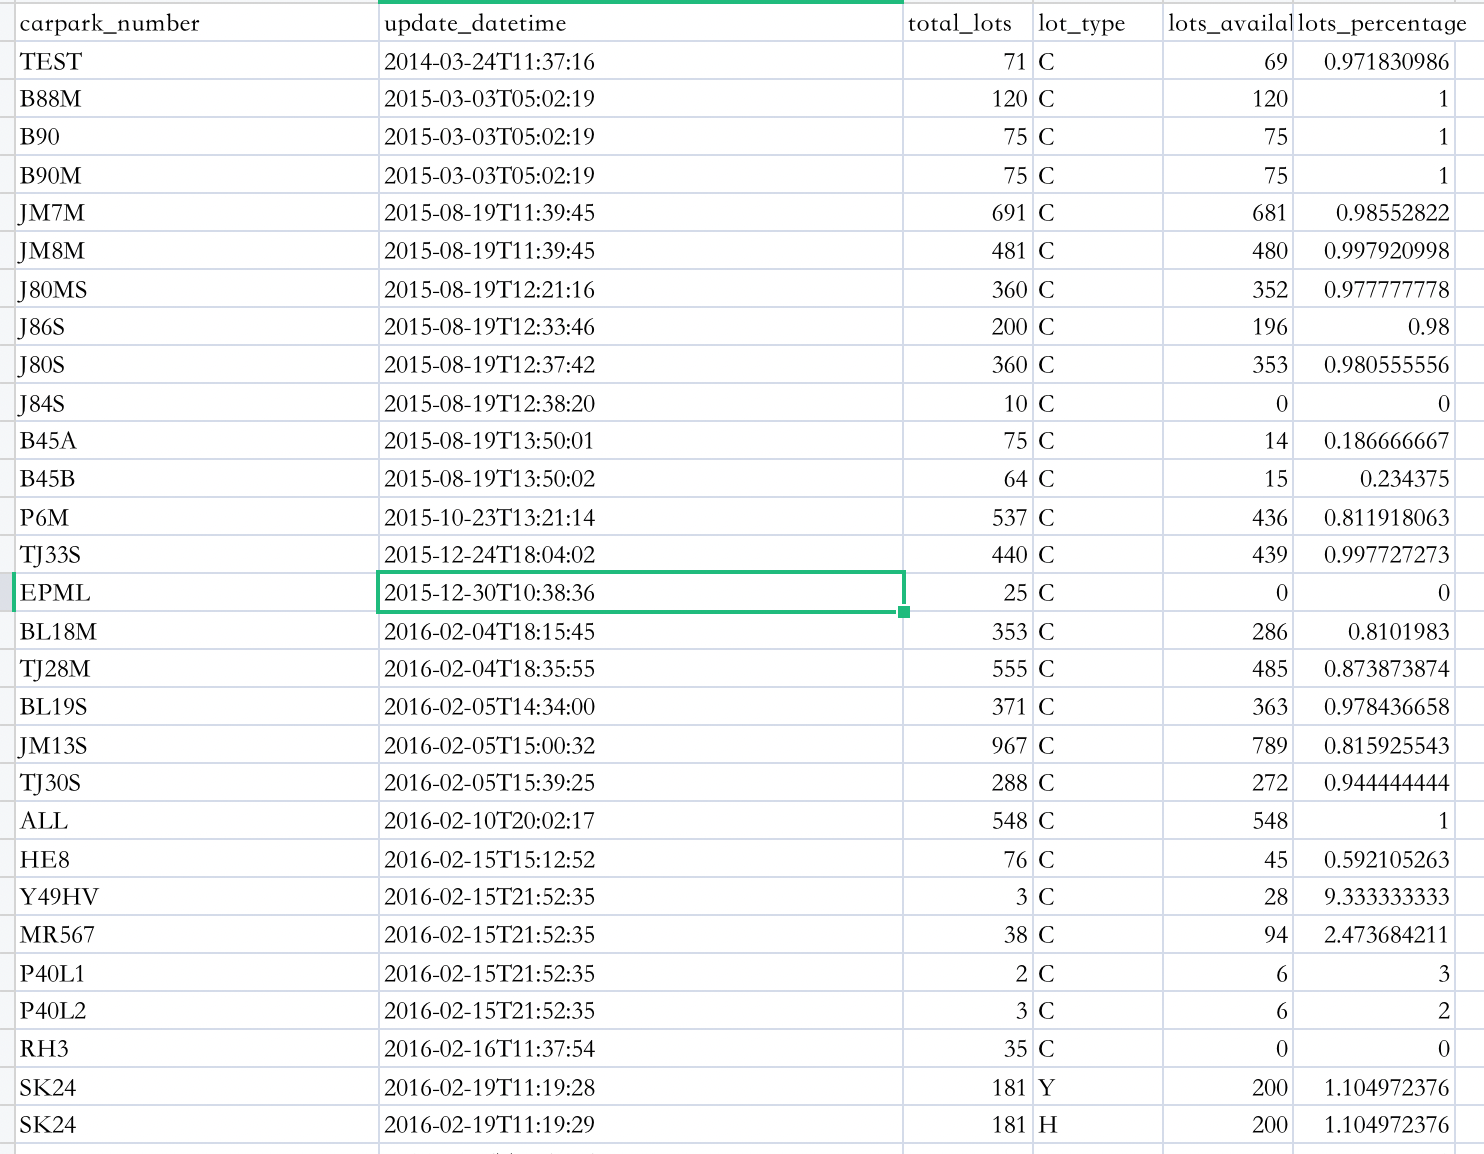

1.4 我们设计了请求API的函数，参数是指定的日期，该函数的功能是每次将日期增加1小时，再去请求API,日期持续时间为一个月。完成api函数就开始绘图。
折线图：我们通过折线图来反映车位的占有比与时间的关系，横轴是时间，间隔是一个小时。竖轴是车位占有比，lots_precentage=lots_avability/total_lots。从途中可以看出在上班的早高峰和晚高峰的时候，lots_percentage有显著性地升高。
观察图表得，每天的凌晨5点为一天最低占有率为40%，后来到早上10点到达第一个高峰，稍有下降，在下午三四点到达第二个高峰，随后不断下降到第二天的凌晨5点。
在周内，周一到周五，高峰可以达到61%，而在周末普遍达到最高点为50%。
其中折线图如图所示，从2022年4月12日开始

困难点：
1.对于传入的参数是00:00:00的时候会返回空的json,我们的想法是因为取数据的间隔是1小时，我们选择前一天的23:59:30和后一天的00:00:30的两次数据做一次平均就可以得到00:00:00的数据。（代码没实现）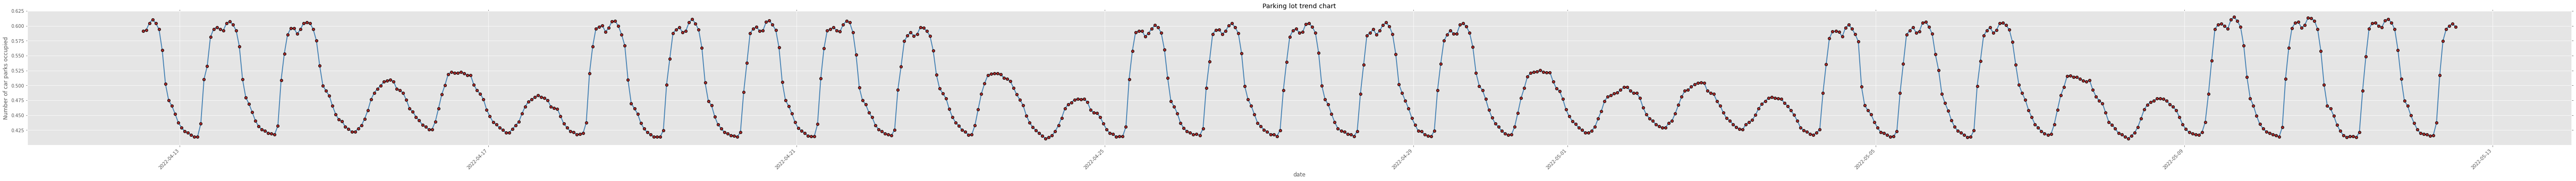

1.5 设计的函数getTop5,我们是通过lots_percentage来衡量一个车场的性能，我们认为在一个小时内的车场的相关性是lots_percentage的趋势。所以我们想找出目标车场lots_percentage上升或下降比率相似的5个车场
实现：先将隔一个小时的dataframe取出，通过车场的名字来merge,所以有了属性lots_percentage1，lots_percentage2,通过公式increase=（lots_percentage1-lots_percentage2）/1h得到上升率或下降率，通过abs函数找出5个上升率最接近的5哥车场，如图所示，找的是2022-4-12-13-31-00到2022-4-12-14-31-00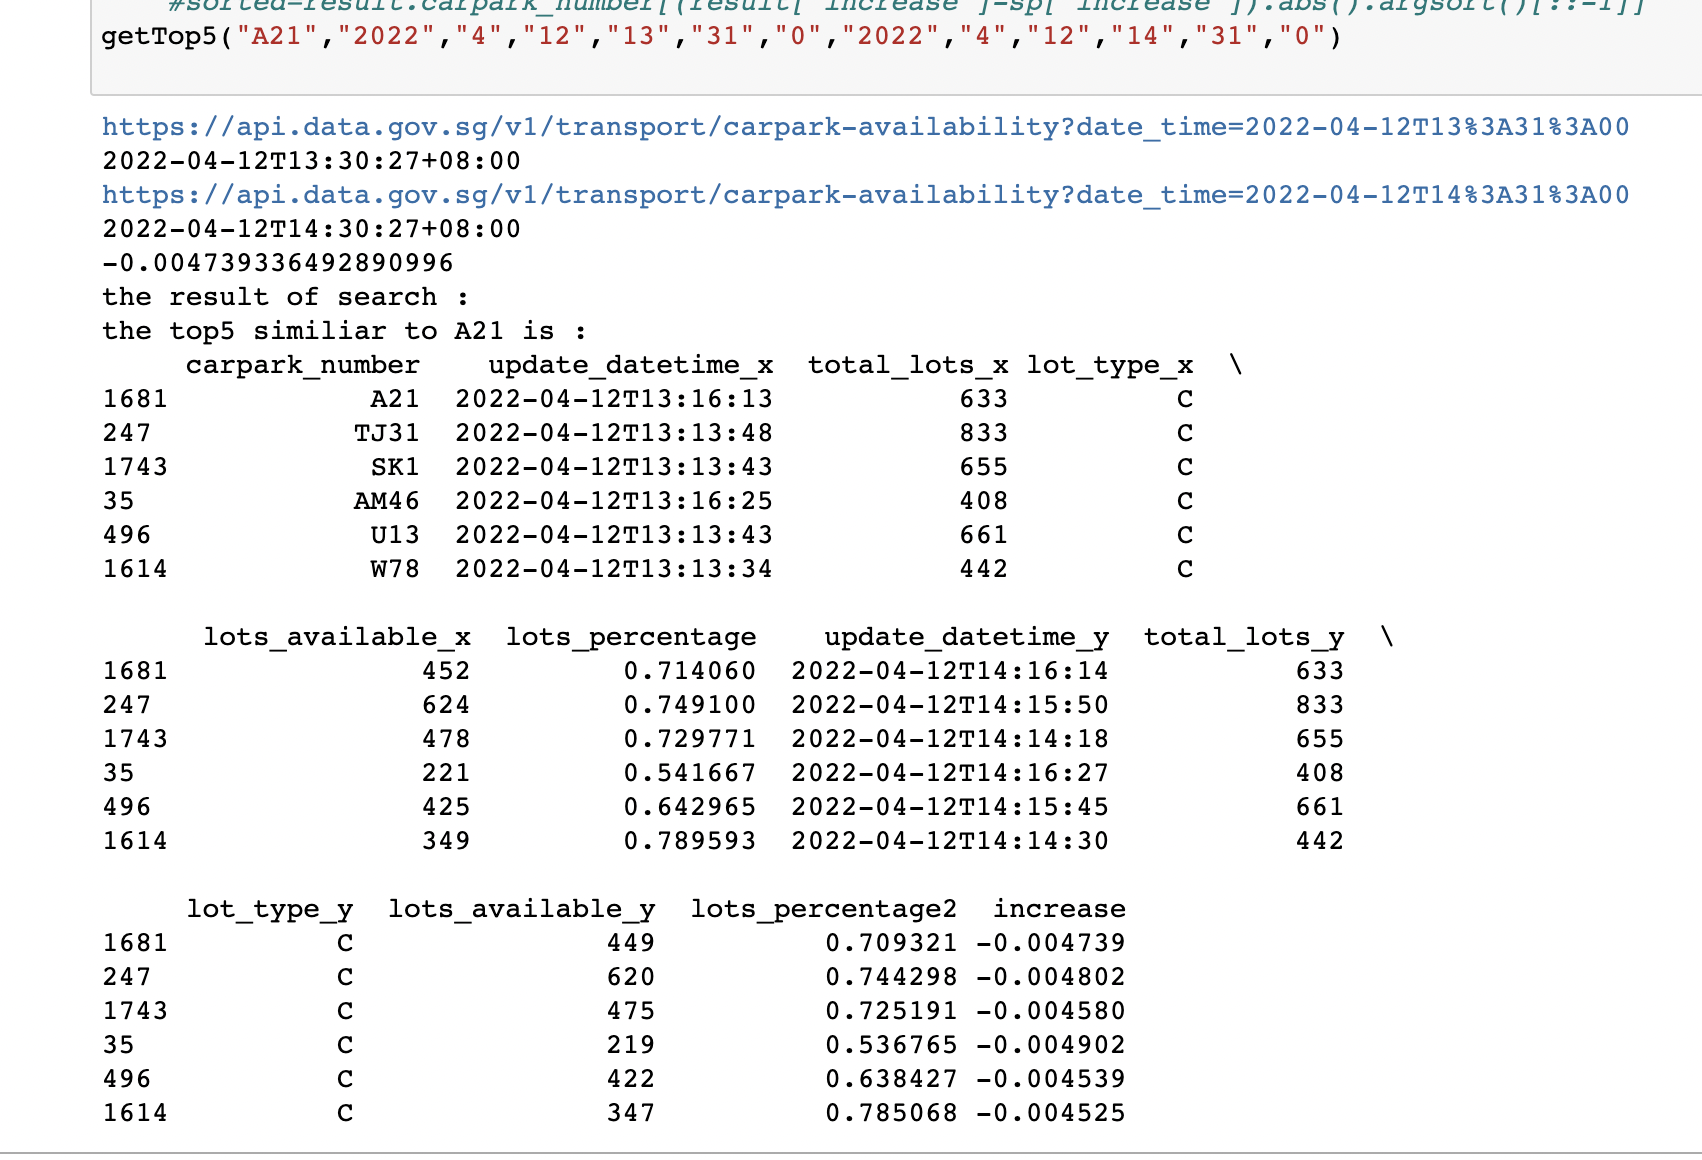